In [20]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pandas as pd

In [21]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Github\VarianceArithmetic\IPyNb


# SinSource

In [22]:
code='Python'

In [23]:
sinSource='Prec'

In [24]:
df = pd.read_csv(f"../{code}/Output/FFT_Step_6_{sinSource}.txt", sep='\t')
df.columns

Index(['SinSource', 'NoiseType', 'Noise', 'Signal', 'Order', 'Freq', 'Test',
       'Step', 'Imag', 'Value', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
       '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63'],
      dtype='object')

In [25]:
df['Noise'].unique()

array([0], dtype=int64)

In [26]:
df['Signal'].unique()

array([nan, 'Sin', 'Cos', 'Linear'], dtype=object)

In [27]:
def PlotOutput( signal, freq, test, noiseType='Gaussian', noise=0, order=6 ):
    sIndex = [str(i) for i in range(2**order)]
    df['Imag Name'] = np.where(df['Imag'], 'Imag ', 'Real ')
    df['Value Name'] = np.where(df['Value'], 'Value Error', 'Uncertainty')
    df['Legend'] = df['Imag Name'] + df['Value Name']
    df.set_index('Legend')
    dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise) & (df['Step']==(order + 4)) &
                (df['Signal']==signal) & (df['Freq']==freq) & (df['Test']==test)].set_index('Legend')
    ax = dfPlot[sIndex].T.plot(style=['--', ':']*2, color=['black']*2+['gray']*2, grid=True, 
            xlabel=f'{"Frequence" if test == "Forward" else "Time"} Index j', ylabel='Value Error or Uncertainty',
            title=f'${signal}(2\pi\; {freq} \;j/2^{order})$ {test} {sinSource} noise={noise}' if freq \
                    else f'${signal}(j/2^{order})$ {test} {sinSource} noise={noise}')
    ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1.0))

# Sin/Cos

## Forward vs Reverse vs Roundtrip

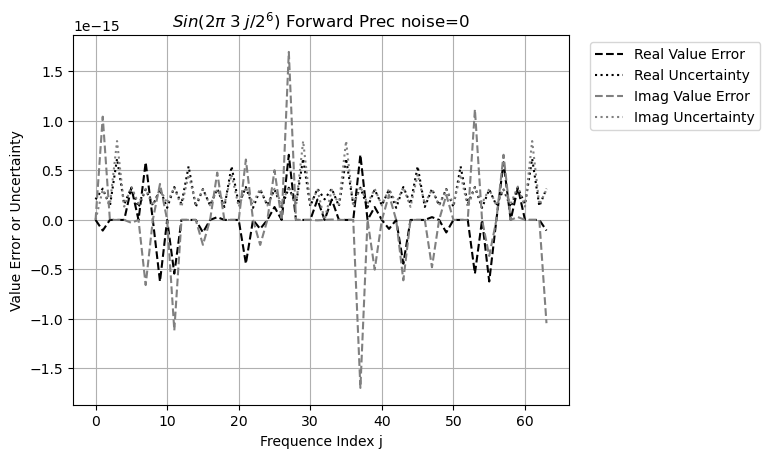

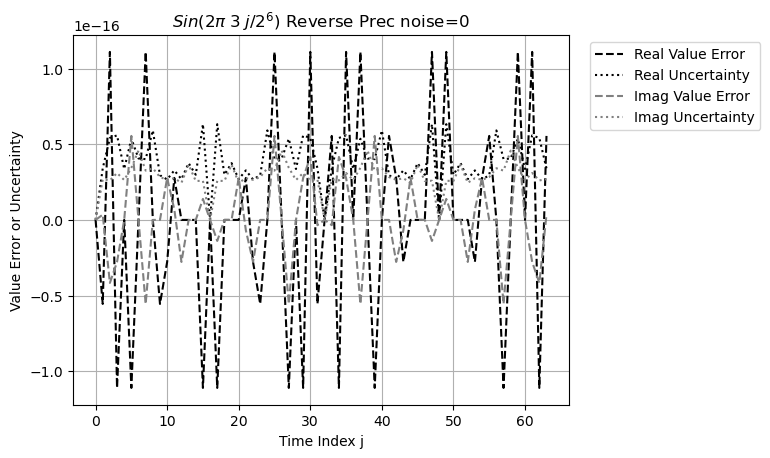

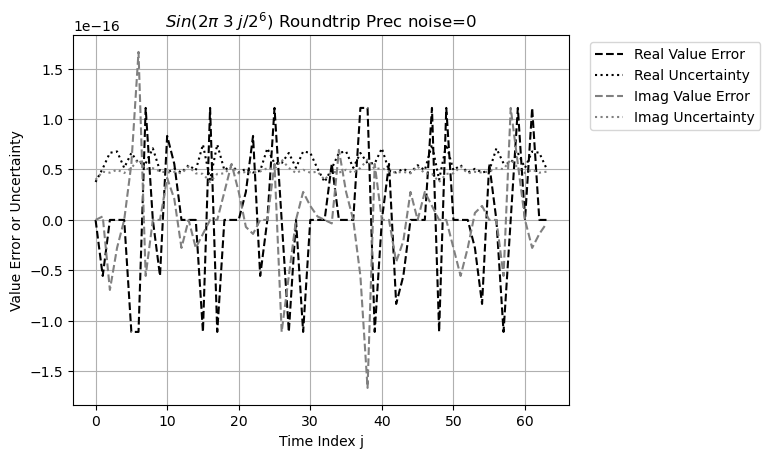

In [28]:
for test in ('Forward', 'Reverse', 'Roundtrip'):
    PlotOutput('Sin', 3, test)

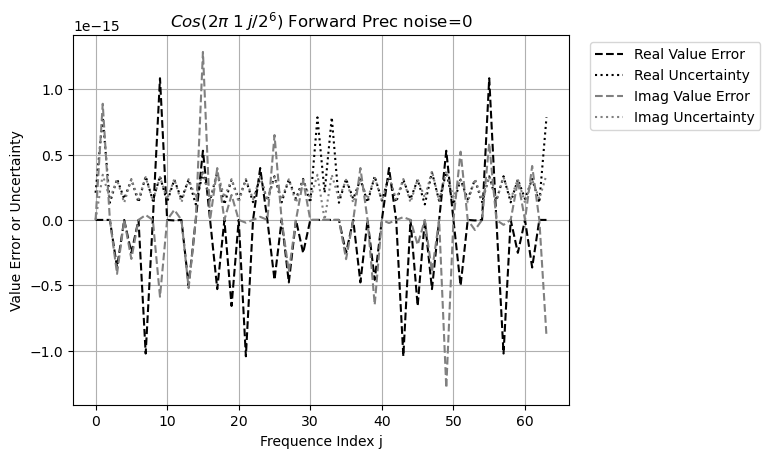

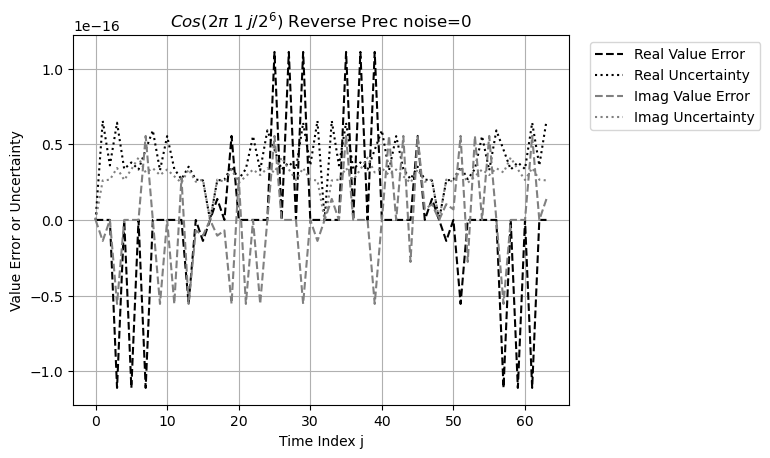

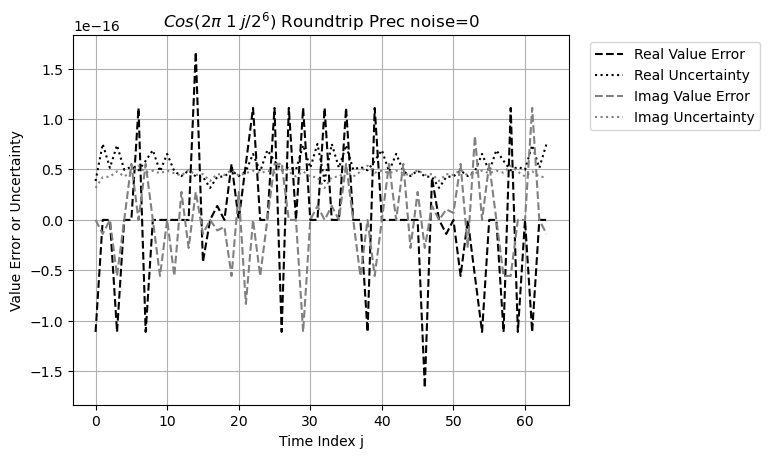

In [29]:
for test in ('Forward', 'Reverse', 'Roundtrip'):
    PlotOutput('Cos', 1, test)

## Sin Different Frequency

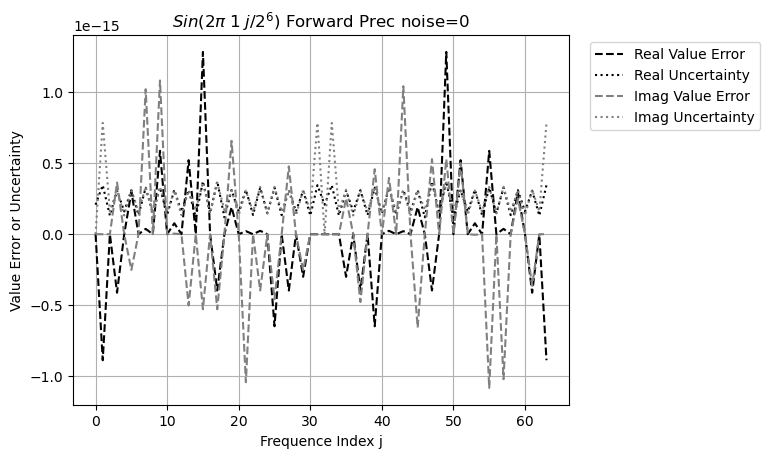

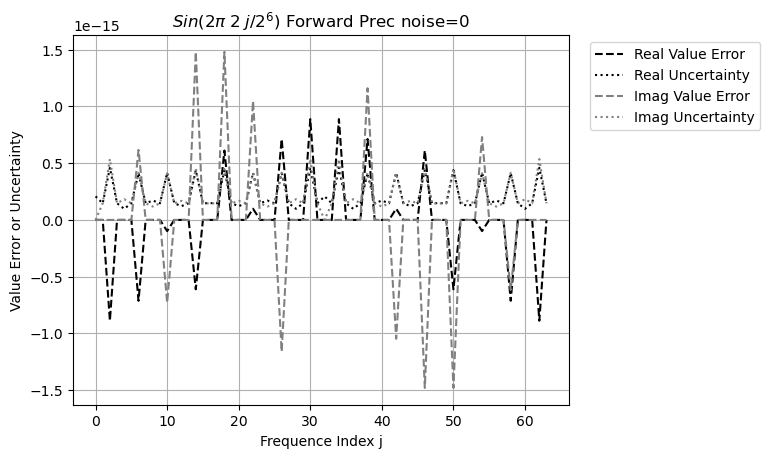

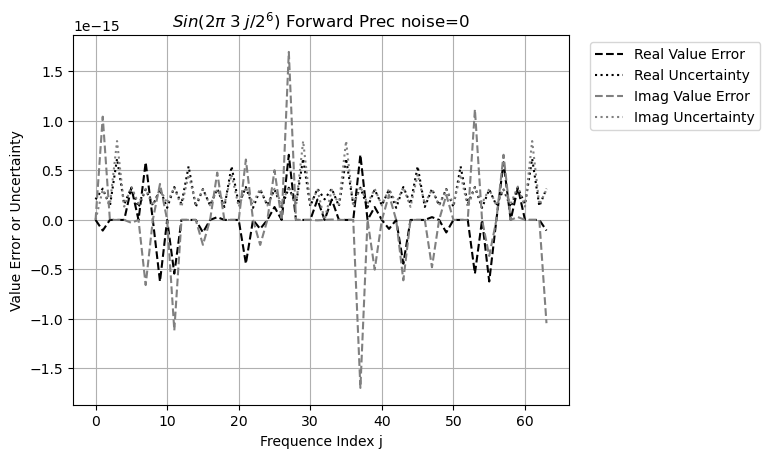

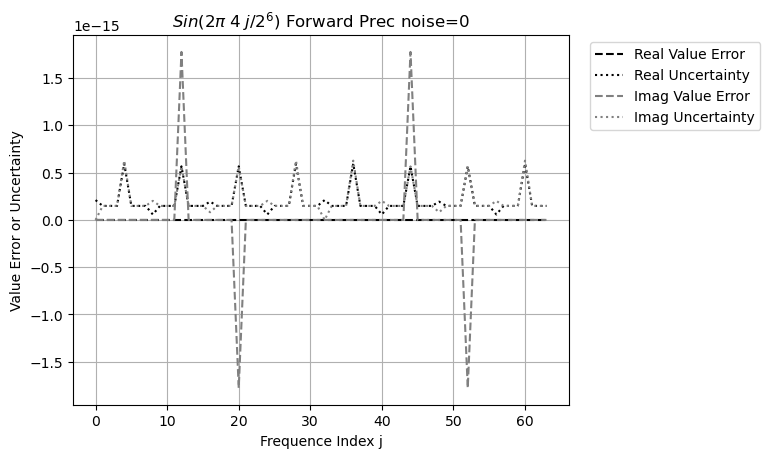

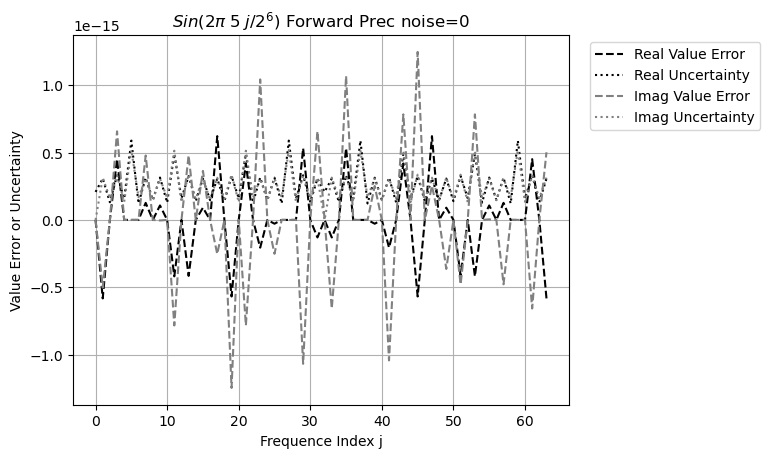

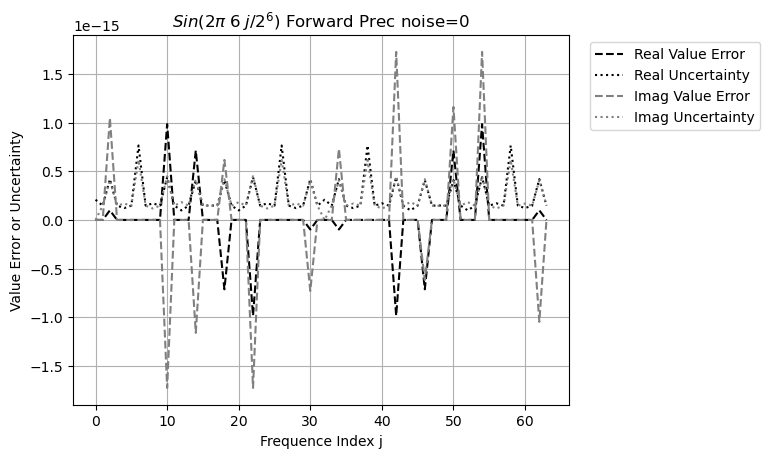

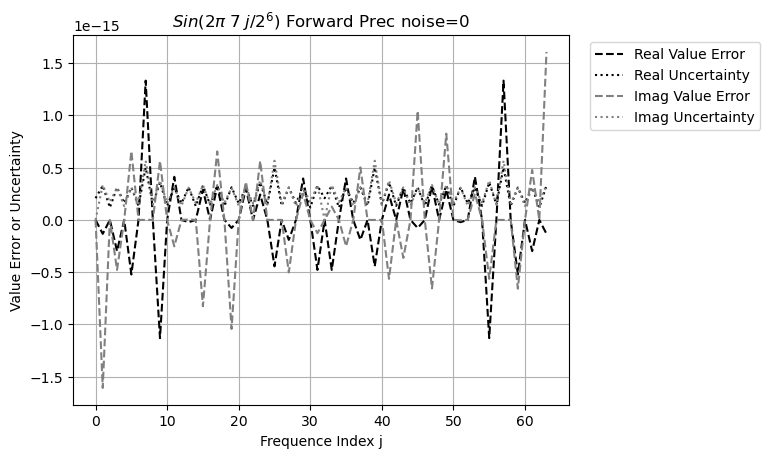

In [30]:
for freq in (1,2,3,4,5,6,7):
    PlotOutput('Sin', freq, 'Forward')

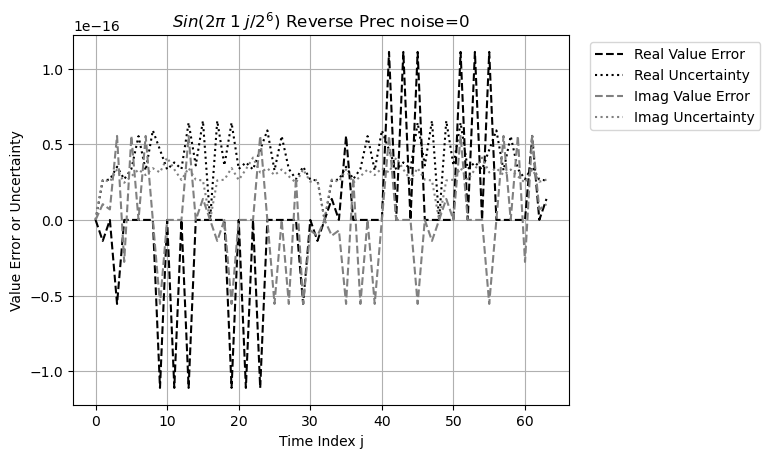

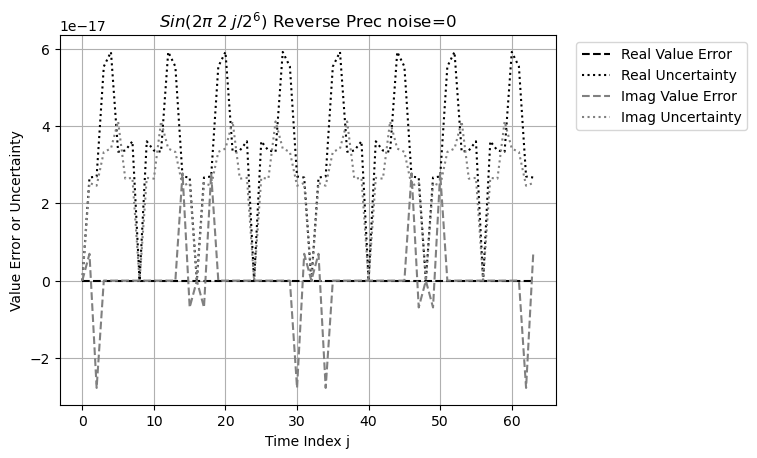

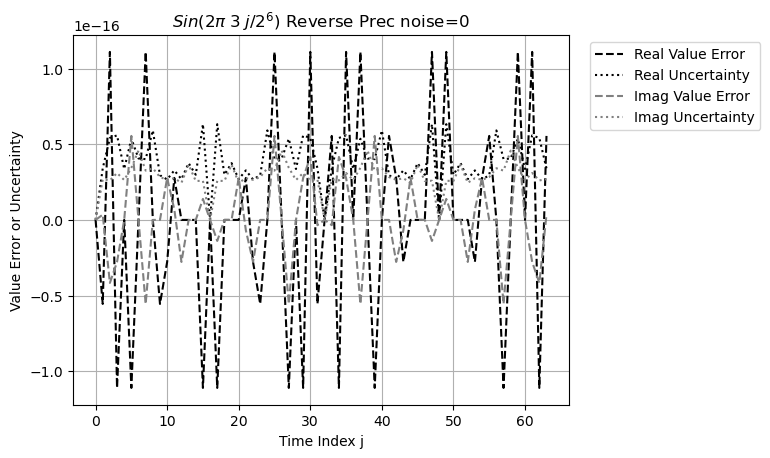

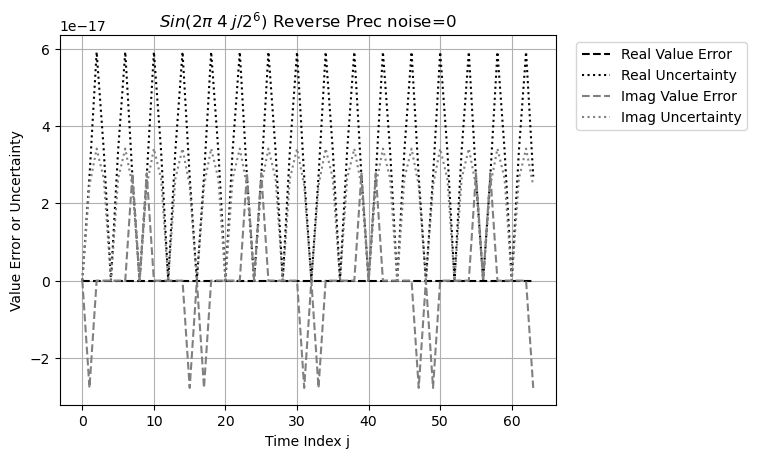

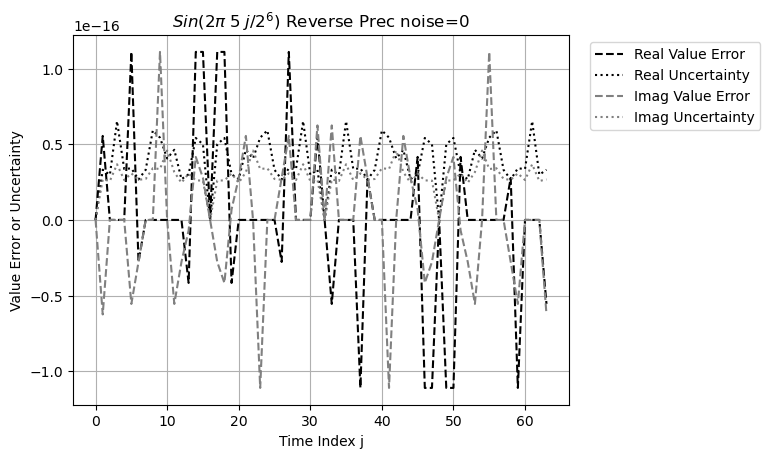

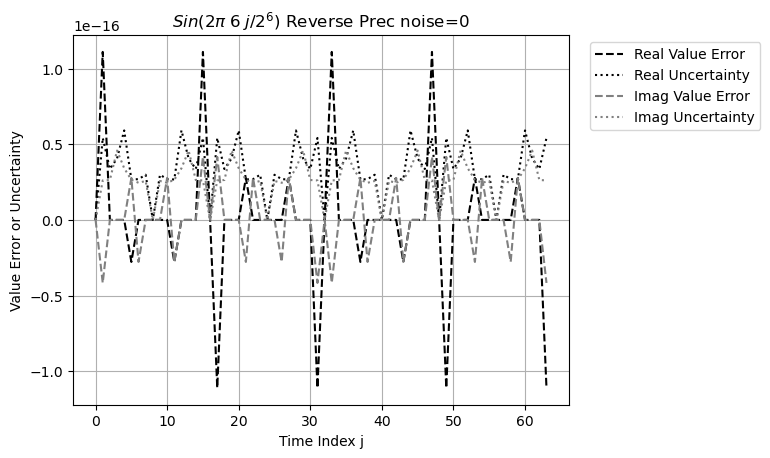

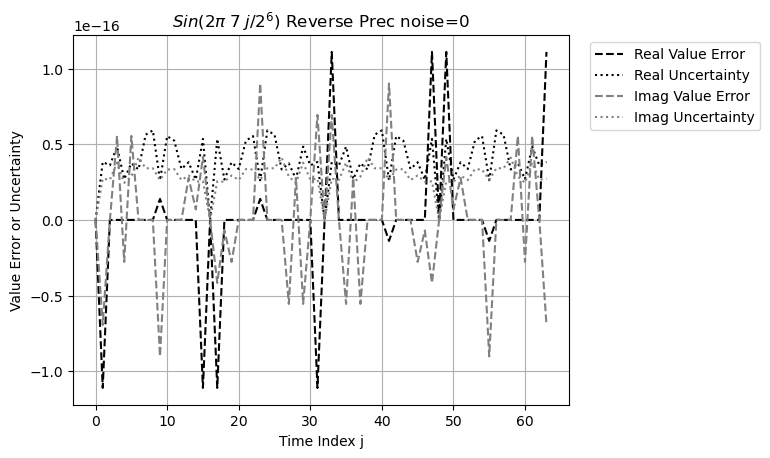

In [31]:
for freq in (1,2,3,4,5,6,7):
    PlotOutput('Sin', freq, 'Reverse')

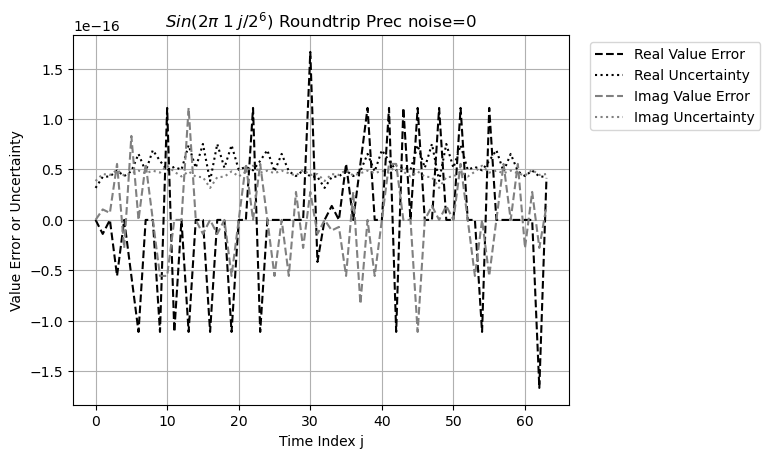

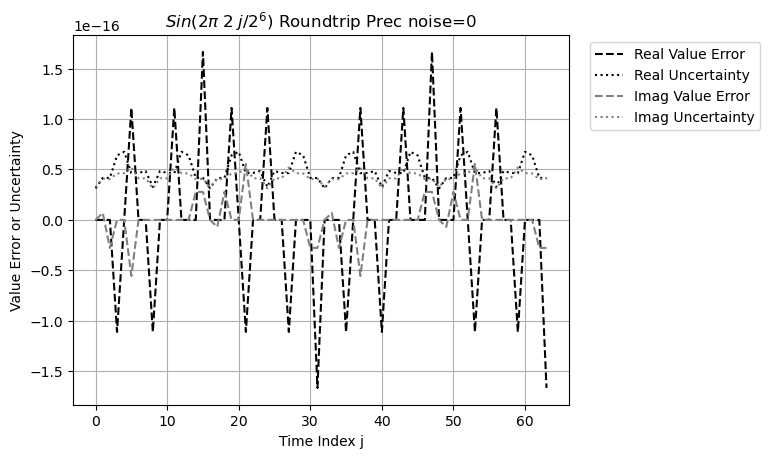

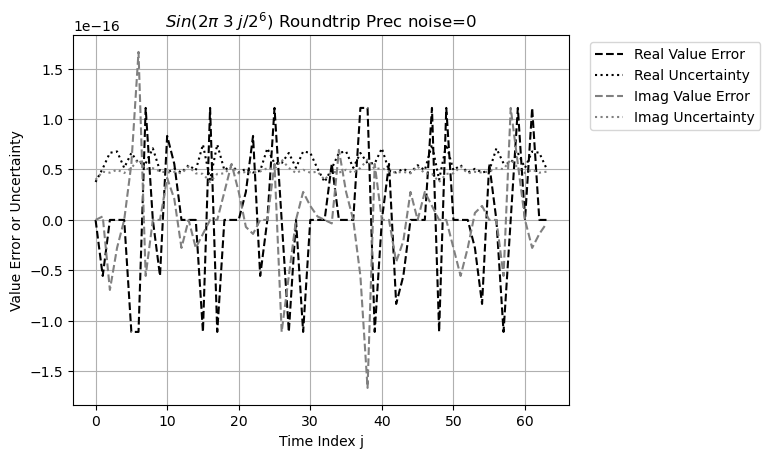

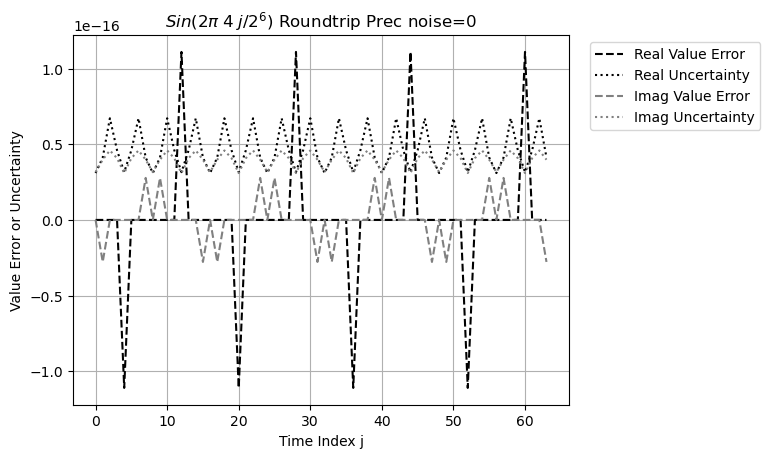

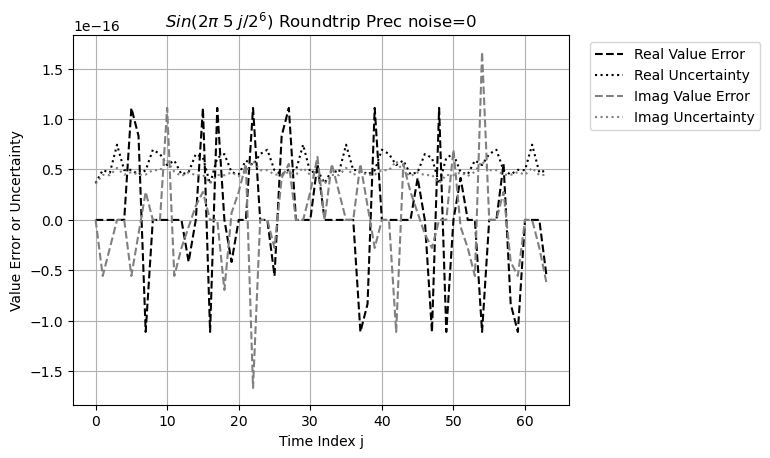

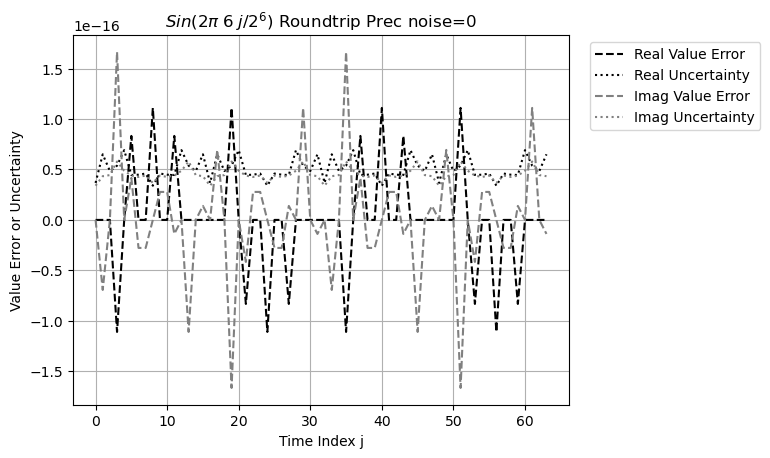

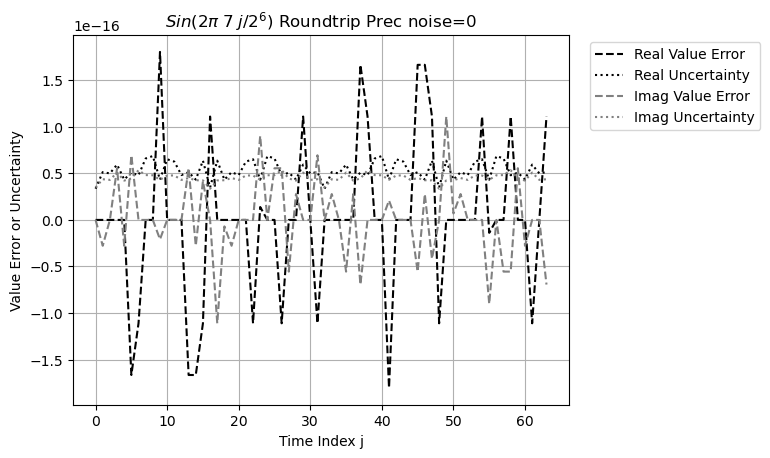

In [32]:
for freq in (1,2,3,4,5,6,7):
    PlotOutput('Sin', freq, 'Roundtrip')

## Noise

In [ ]:
for test in ('Forward', 'Reverse', 'Roundtrip'):
    PlotOutput('Sin', 1, test)

# Linear

In [ ]:
for test in ('Forward', 'Reverse', 'Roundtrip'):
    PlotOutput('Linear', 0, test)

# Differnt Order

In [ ]:
for test in ('Forward', 'Reverse', 'Roundtrip'):
    PlotOutput('Sin', 1, test)

In [ ]:
df = pd.read_csv(f"../{code}/Output/FFT_Step_5_{sinSource}.txt", sep='\t')
for test in ('Forward', 'Reverse', 'Roundtrip'):
    PlotOutput('Sin', 1, test, order=5)

In [ ]:
df = pd.read_csv(f"../{code}/Output/FFT_Step_4_{sinSource}.txt", sep='\t')
for test in ('Forward', 'Reverse', 'Roundtrip'):
    PlotOutput('Sin', 1, test, order=4)

In [ ]:
df = pd.read_csv(f"../{code}/Output/FFT_Step_3_{sinSource}.txt", sep='\t')
for test in ('Forward', 'Reverse', 'Roundtrip'):
    PlotOutput('Sin', 1, test, order=3)